In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from keras import Sequential
!pip install keras
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [2]:
# Load the dataset
from google.colab import drive
drive.mount('/content/drive')
customerchurn = pd.read_csv( '/content/drive/My Drive/Colab Notebooks/Assignment 2/CustomerChurn_dataset.csv')



Mounted at /content/drive


In [3]:
customerchurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes





                              Data Visualization

In [4]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Calculate counts for gender and churn
gender_counts = customerchurn['gender'].value_counts()
churn_counts = customerchurn['Churn'].value_counts()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'domain'}, {'type': 'domain'}]])
# Create Pie chart for Gender
fig.add_trace(go.Pie(labels=gender_counts.index, values=gender_counts.values, name="Gender"), 1, 1)

# Create Pie chart for Churn
fig.add_trace(go.Pie(labels=churn_counts.index, values=churn_counts.values, name="Churn"), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=0.4, hoverinfo="label+percent+name", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)]
)

fig.show()


Approximately 26.6% of customers switched to another firm, with an almost equal distribution of 49.5% female and 50.5% male customers.

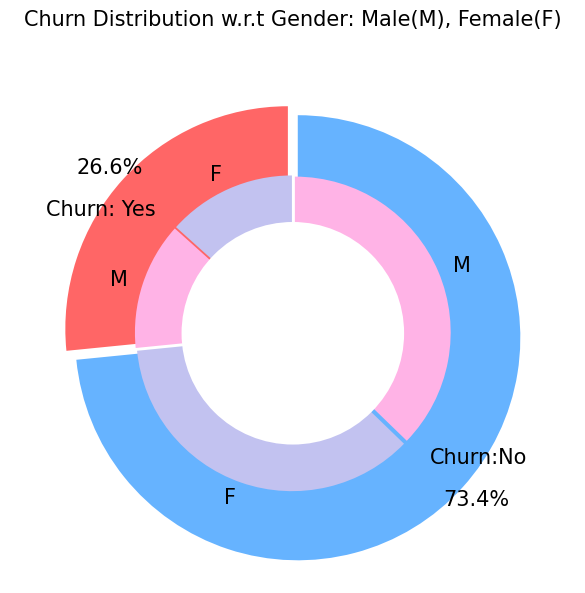

In [5]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3)
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot

plt.axis('equal')
plt.tight_layout()
plt.show()


Both genders showed a similar tendency to switch service providers, as indicated by the nearly equal percentages and counts of customers who made the change. This suggests that gender played a negligible role in influencing customer decisions to churn. Other factors likely had a more significant impact on these decisions.

In [6]:
import plotly.express as px

fig = px.histogram(customerchurn, x="Churn", color="Contract", barmode="group", title="<b>Customer contract distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

The data indicates that customers who used Electronic Check as their payment method were more likely to churn, potentially due to payment issues. In contrast, customers who opted for Credit Card automatic transfer, Bank Automatic Transfer, or Mailed Check had lower churn rates, suggesting that reliable payment methods contribute to customer retention. These findings emphasize the importance of offering diverse and secure payment options to reduce churn.

In [7]:
fig = go.Figure()

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [965, 992, 219, 240],
  name = 'DSL',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [889, 910, 664, 633],
  name = 'Fiber optic',
))

fig.add_trace(go.Bar(
  x = [['Churn:No', 'Churn:No', 'Churn:Yes', 'Churn:Yes'],
       ["Female", "Male", "Female", "Male"]],
  y = [690, 717, 56, 57],
  name = 'No Internet',
))

fig.update_layout(title_text="<b>Churn Distribution w.r.t. Internet Service and Gender</b>")

fig.show()


Many customers prefer Fiber optic, but it has a high churn rate, possibly due to dissatisfaction. In contrast, DSL, chosen by the majority, has lower churn, indicating higher satisfaction.

In [8]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(customerchurn, x="Churn", color="Dependents", barmode="group", title="<b>Dependents distribution</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers who do not have dependents are more inclined to churn.

In [9]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(customerchurn, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution w.r.t. Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers who do not have partners are more likely to churn.

In [10]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(customerchurn, x="Churn", color="SeniorCitizen", title="<b>Chrun distribution w.r.t. Senior Citizen</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Interestingly, the dataset reveals that the percentage of senior citizens is relatively low, and a significant portion of them tends to churn. This suggests that senior citizens might be more likely to churn compared to other age groups

In [11]:
color_map = {"Yes": "#FF97FF", "No": "#AB63FA"}
fig = px.histogram(customerchurn, x="Churn", color="OnlineSecurity", barmode="group", title="<b>Churn w.r.t Online Security</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Most customers churn in the absence of online security

In [12]:
color_map = {"Yes": '#FFA15A', "No": '#00CC96'}
fig = px.histogram(customerchurn, x="Churn", color="PaperlessBilling",  title="<b>Chrun distribution w.r.t. Paperless Billing</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


Customers who opt for paperless billing have a higher likelihood of churning

In [13]:
fig = px.histogram(customerchurn, x="Churn", color="TechSupport",barmode="group",  title="<b>Chrun distribution w.r.t. TechSupport</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Customers who do not have access to TechSupport are at a higher risk of switching to another service provider.

In [14]:
color_map = {"Yes": '#00CC96', "No": '#B6E880'}
fig = px.histogram(customerchurn, x="Churn", color="PhoneService", title="<b>Chrun distribution w.r.t. Phone Service</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()


A very small fraction of customers do not subscribe to phone service, and among this group, approximately one-third of the customers are more likely to churn.

<ipython-input-15-efbe1baa4d7d>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-15-efbe1baa4d7d>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




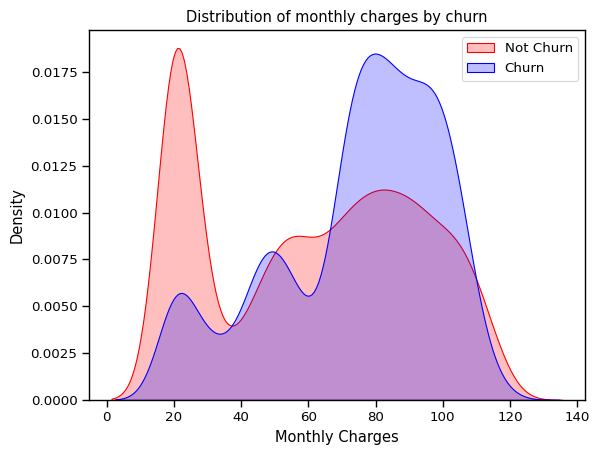

In [15]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(customerchurn.MonthlyCharges[(customerchurn["Churn"] == 'No') ],
                color="Red", shade = True);
ax = sns.kdeplot(customerchurn.MonthlyCharges[(customerchurn["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

Customers with higher Monthly Charges are also more likely to churn

In [16]:
fig = px.box(customerchurn, x='Churn', y = 'tenure')

# Update yaxis properties
fig.update_yaxes(title_text='Tenure (Months)', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)

fig.show()


New customers are more likely to churn

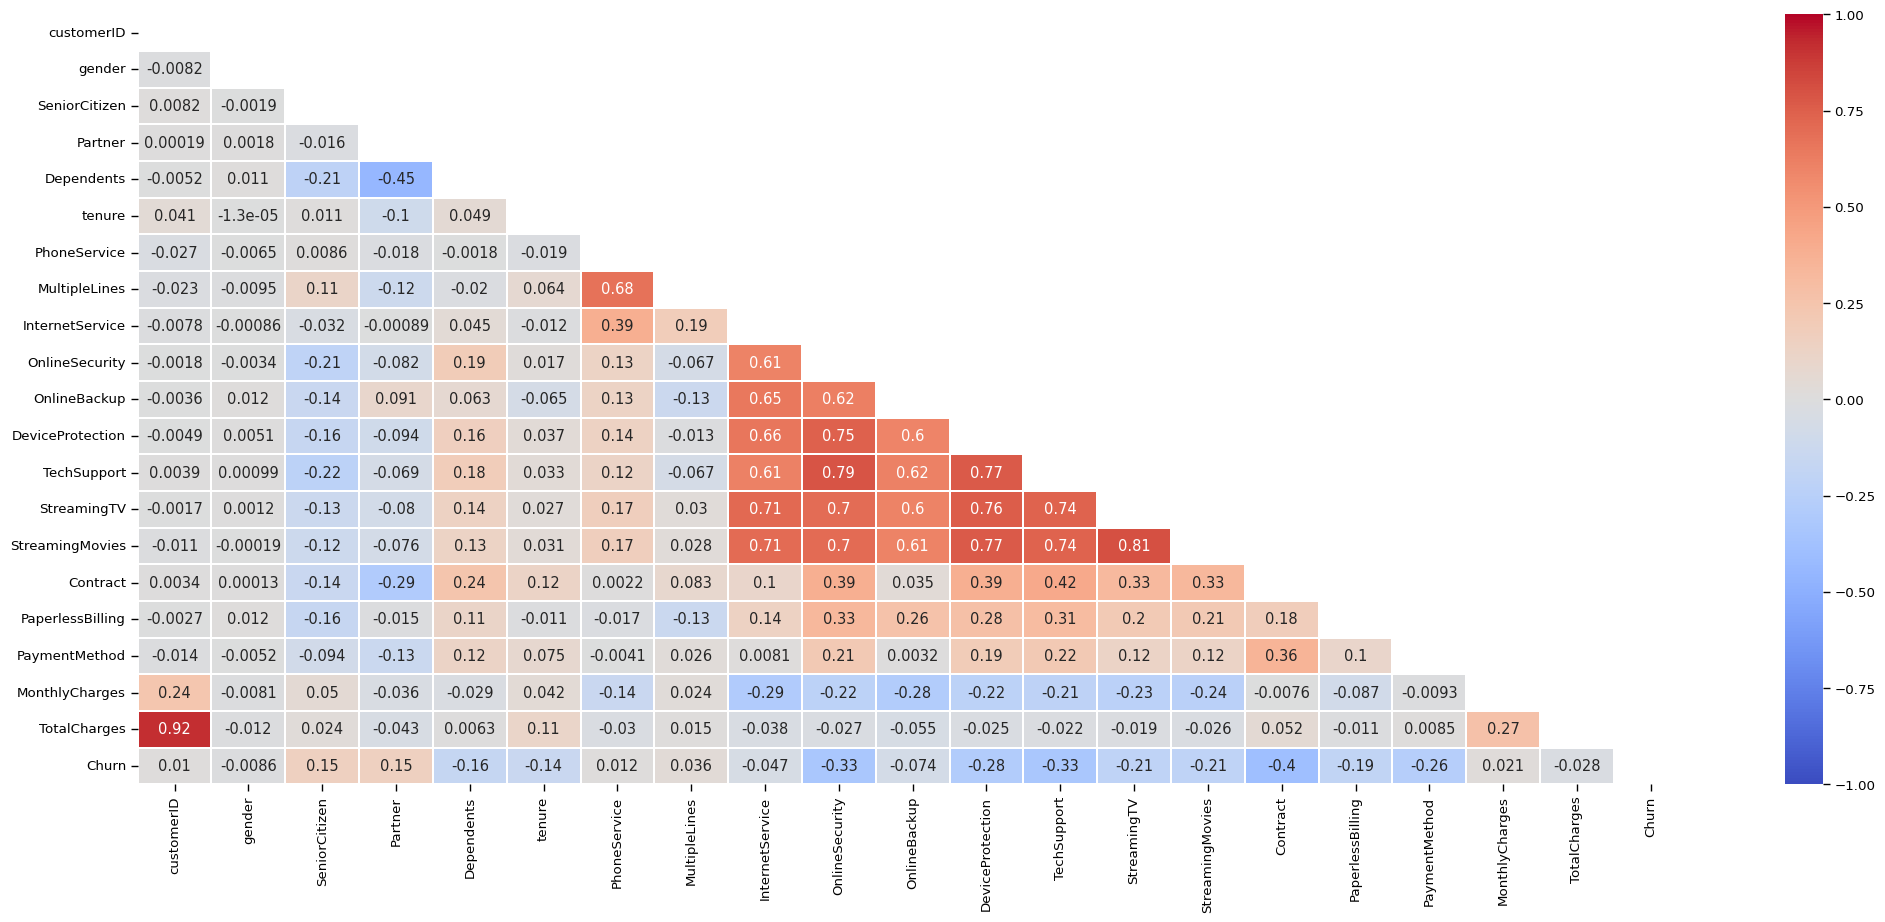

In [17]:
plt.figure(figsize=(25, 10))

corr = customerchurn.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)


In [18]:
customerchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# Drop the 'customerID' column
customerchurn = customerchurn.drop('customerID', axis=1)
# Check for missing values
missing_values = customerchurn.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [20]:
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod', 'Churn']

In [21]:
# Factorize each categorical column
for column in categorical_columns:
    customerchurn[column], _ = pd.factorize(customerchurn[column])
categorical_encoded = customerchurn[categorical_columns]

In [22]:
customerchurn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85,0
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.5,0
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15,1
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75,0
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,1,24,1,2,0,1,1,1,1,1,1,1,0,1,84.80,1990.5,0
7039,0,0,0,1,72,1,2,1,0,0,1,0,1,1,1,0,3,103.20,7362.9,0
7040,0,0,0,1,11,0,0,0,1,1,0,0,0,0,0,0,0,29.60,346.45,0
7041,1,1,0,0,4,1,2,1,0,1,0,0,0,0,0,0,1,74.40,306.6,1


In [23]:
categorical_encoded

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0
7039,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0
7040,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
7041,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1


float64


<ipython-input-24-7c48d94b770a>:13: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-24-7c48d94b770a>:15: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




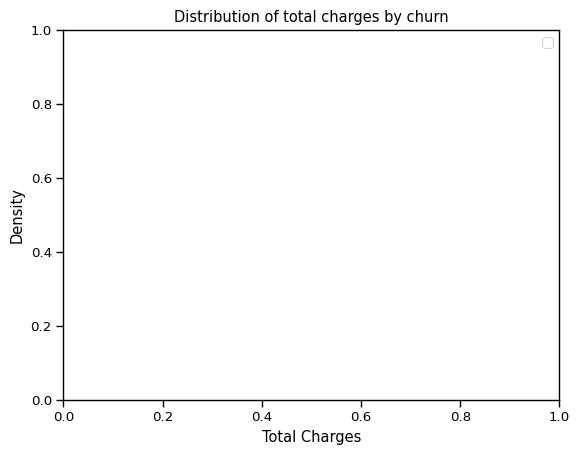

In [24]:
# Replace any non-numeric characters (e.g., spaces) with NaN
customerchurn['TotalCharges'] = pd.to_numeric(customerchurn['TotalCharges'], errors='coerce')

# Calculate the mean of the 'TotalCharges' column
mean_total_charges = customerchurn['TotalCharges'].mean()

# Fill NaN values with the mean
customerchurn['TotalCharges'].fillna(mean_total_charges, inplace=True)

# Check the data type to confirm it's numeric
print(customerchurn['TotalCharges'].dtype)

ax = sns.kdeplot(customerchurn.TotalCharges[(customerchurn["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(customerchurn.TotalCharges[(customerchurn["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn');

In [25]:
# Selecting numerical columns
numerical_columns = customerchurn.columns.difference(categorical_columns)
# Extracting the numerical variables
numerical_variables = customerchurn[numerical_columns]
# Displaying the numerical variables
numerical_variables

,MonthlyCharges,SeniorCitizen,TotalCharges,tenure
0,29.85,0,29.85,1
1,56.95,0,1889.50,34
2,53.85,0,108.15,2
3,42.30,0,1840.75,45
4,70.70,0,151.65,2
...,...,...,...,...
7038,84.80,0,1990.50,24
7039,103.20,0,7362.90,72
7040,29.60,0,346.45,11
7041,74.40,1,306.60,4


In [26]:
# Concatenate the DataFrames along the columns axis (axis=1)
processed_data = pd.concat([categorical_encoded, numerical_variables], axis=1)

# Display the processed_data DataFrame
processed_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   Partner           7043 non-null   int64  
 2   Dependents        7043 non-null   int64  
 3   PhoneService      7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   InternetService   7043 non-null   int64  
 6   OnlineSecurity    7043 non-null   int64  
 7   OnlineBackup      7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  Churn             7043 non-null   int64  
 16  MonthlyCharges    7043 non-null   float64


In [27]:
processed_data

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,SeniorCitizen,TotalCharges,tenure
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.85,0,29.85,1
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0,56.95,0,1889.50,34
2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,53.85,0,108.15,2
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0,42.30,0,1840.75,45
4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1,70.70,0,151.65,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0,84.80,0,1990.50,24
7039,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0,103.20,0,7362.90,72
7040,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,29.60,0,346.45,11
7041,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1,74.40,1,306.60,4


In [28]:
# Define the target variable (y)
y = processed_data['Churn']

# Define the features (X)
x = processed_data.drop(columns=['Churn'])


In [29]:
# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(x, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)



In [30]:
# Feature selection with Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

In [31]:
feature_importance_df

,Feature,Importance
0,gender,0.027497
1,Partner,0.020745
2,Dependents,0.020038
3,PhoneService,0.002318
4,MultipleLines,0.017147
5,InternetService,0.024721
6,OnlineSecurity,0.045813
7,OnlineBackup,0.017104
8,DeviceProtection,0.013285
9,TechSupport,0.014544


In [32]:
# Filter features with importance
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.029]
important_features

,Feature,Importance
6,OnlineSecurity,0.045813
12,Contract,0.166295
14,PaymentMethod,0.040758
15,MonthlyCharges,0.213891
17,TotalCharges,0.201582
18,tenure,0.114893


In [33]:
# Define the target variable (y)
y = processed_data['Churn']

# Define the features (X)
x = processed_data[['OnlineSecurity', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure']]


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)



In [34]:
customerchurn[['OnlineSecurity', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'tenure']]

,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tenure
0,0,0,0,29.85,29.85,1
1,1,1,1,56.95,1889.50,34
2,1,0,1,53.85,108.15,2
3,1,1,2,42.30,1840.75,45
4,0,0,0,70.70,151.65,2
...,...,...,...,...,...,...
7038,1,1,1,84.80,1990.50,24
7039,0,1,3,103.20,7362.90,72
7040,1,0,0,29.60,346.45,11
7041,0,0,1,74.40,306.60,4


In [35]:
x

,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tenure
0,0,0,0,29.85,29.85,1
1,1,1,1,56.95,1889.50,34
2,1,0,1,53.85,108.15,2
3,1,1,2,42.30,1840.75,45
4,0,0,0,70.70,151.65,2
...,...,...,...,...,...,...
7038,1,1,1,84.80,1990.50,24
7039,0,1,3,103.20,7362.90,72
7040,1,0,0,29.60,346.45,11
7041,0,0,1,74.40,306.60,4


In [36]:
X_scaled

,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tenure
0,-0.903589,-0.828207,-1.145198,-1.160323,-0.994971,-1.277445
1,0.351386,0.371271,-0.274744,-0.259629,-0.173876,0.066327
2,0.351386,-0.828207,-0.274744,-0.362660,-0.960399,-1.236724
3,0.351386,0.371271,0.595711,-0.746535,-0.195400,0.514251
4,-0.903589,-0.828207,-1.145198,0.197365,-0.941193,-1.236724
...,...,...,...,...,...,...
7038,0.351386,0.371271,-0.274744,0.665992,-0.129281,-0.340876
7039,-0.903589,0.371271,1.466165,1.277533,2.242808,1.613701
7040,0.351386,-0.828207,-1.145198,-1.168632,-0.855182,-0.870241
7041,-0.903589,-0.828207,-0.274744,0.320338,-0.872777,-1.155283


In [37]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [38]:
# Split the data into training and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [39]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [40]:
X_scaled.head()

,OnlineSecurity,Contract,PaymentMethod,MonthlyCharges,TotalCharges,tenure
0,-0.903589,-0.828207,-1.145198,-1.160323,-0.994971,-1.277445
1,0.351386,0.371271,-0.274744,-0.259629,-0.173876,0.066327
2,0.351386,-0.828207,-0.274744,-0.362660,-0.960399,-1.236724
3,0.351386,0.371271,0.595711,-0.746535,-0.195400,0.514251
4,-0.903589,-0.828207,-1.145198,0.197365,-0.941193,-1.236724


In [41]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Define a function to create your Keras model
def create_model(units=64, activation='relu'):
    # Define the input layer
    input_layer = Input(shape=(X_train.shape[1],))

    # Add a hidden layer
    hidden_layer = Dense(units, activation=activation)(input_layer)

    # Add the output layer
    output_layer = Dense(1, activation='sigmoid')(hidden_layer)

    # Create the model
    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Create the model with specified hyperparameters
model = create_model(units=32, activation='relu')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC Score: {roc_auc:.4f}')


Epoch 1/10
177/177 [==============================] - 1s 2ms/step - loss: 0.5356 - accuracy: 0.7410 - val_loss: 0.4598 - val_accuracy: 0.7741
Epoch 2/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4549 - accuracy: 0.7799 - val_loss: 0.4442 - val_accuracy: 0.7812
Epoch 3/10
177/177 [==============================] - 1s 3ms/step - loss: 0.4460 - accuracy: 0.7794 - val_loss: 0.4376 - val_accuracy: 0.7841
Epoch 4/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.7796 - val_loss: 0.4354 - val_accuracy: 0.7812
Epoch 5/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.7820 - val_loss: 0.4329 - val_accuracy: 0.7940
Epoch 6/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.7838 - val_loss: 0.4322 - val_accuracy: 0.7812
Epoch 7/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4348 - accuracy: 0.7851 - val_loss: 0.4340 - val_accuracy: 0.7898
Epoch 

In [42]:
# Evaluate the model on the train set
test_loss, test_accuracy = model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


177/177 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7932
Test Loss: 0.4300
Test Accuracy: 0.7932


In [43]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

23/23 [==============================] - 0s 2ms/step - loss: 0.3916 - accuracy: 0.8085
Test Loss: 0.3916
Test Accuracy: 0.8085


In [44]:
# Evaluate the model on the test set
y_pred = (model.predict(X_test) > 0.5).astype(int)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {roc_auc:.4f}')

23/23 [==============================] - 0s 1ms/step
AUC Score: 0.7251


In [45]:
# Define the hyperparameters and the search space for the Keras Tuner
import kerastuner as kt

def model_builder(hp):
    model = tf.keras.Sequential()

    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=32, max_value=128, step=32)
    model.add(Dense(units=hp_units, activation='relu', input_shape=(X_train.shape[1],)))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='intro_to_kt')

<ipython-input-45-b58dfdcc7af6>:2: DeprecationWarning:

`import kerastuner` is deprecated, please use `import keras_tuner`.



In [46]:
# Search for the best hyperparameters using Keras Tuner
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


Trial 18 Complete [00h 00m 03s]
val_accuracy: 0.7982954382896423

Best val_accuracy So Far: 0.7982954382896423
Total elapsed time: 00h 00m 52s


In [47]:
tuned_model = tuner.hypermodel.build(best_hps)
history = tuned_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
177/177 [==============================] - 1s 2ms/step - loss: 0.4539 - accuracy: 0.7804 - val_loss: 0.4025 - val_accuracy: 0.7915
Epoch 2/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7859 - val_loss: 0.3956 - val_accuracy: 0.8128
Epoch 3/10
177/177 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.7927 - val_loss: 0.3981 - val_accuracy: 0.8028
Epoch 4/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.7969 - val_loss: 0.3936 - val_accuracy: 0.8128
Epoch 5/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4318 - accuracy: 0.7938 - val_loss: 0.3865 - val_accuracy: 0.8099
Epoch 6/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.7952 - val_loss: 0.3922 - val_accuracy: 0.8014
Epoch 7/10
177/177 [==============================] - 0s 2ms/step - loss: 0.4273 - accuracy: 0.7961 - val_loss: 0.3924 - val_accuracy: 0.8043
Epoch 

In [48]:
# Evaluate the model on the train set
test_loss, test_accuracy = tuned_model.evaluate(X_train, y_train)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')


177/177 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.7916
Test Loss: 0.4287
Test Accuracy: 0.7916


In [49]:
# Evaluate the model on the test set
test_loss, test_accuracy = tuned_model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

23/23 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.8113
Test Loss: 0.3981
Test Accuracy: 0.8113


In [50]:
# Evaluate the model on the test set
y_pred = (tuned_model.predict(X_test) > 0.5).astype(int)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'AUC Score: {roc_auc:.4f}')

23/23 [==============================] - 0s 1ms/step
AUC Score: 0.6873


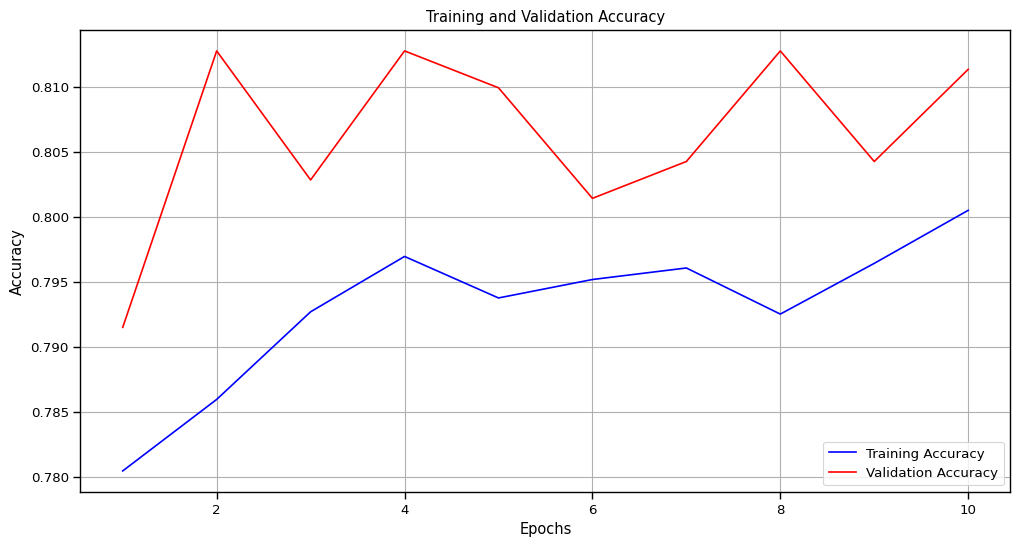

In [51]:
import matplotlib.pyplot as plt

# Access the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


## SAVING THE MODEL

---



In [52]:
Model=model.save( '/content/drive/My Drive/Colab Notebooks/Assignment 2/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [53]:
from tensorflow.keras.models import load_model

In [54]:
## load the saved model to use for prediction
Model = load_model('/content/drive/My Drive/Colab Notebooks/Assignment 2/model.h5')

In [55]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'AUC Score: {roc_auc:.4f}')

23/23 [==============================] - 0s 2ms/step
Accuracy: 0.8085
Precision: 0.6667
Recall: 0.5484
AUC Score: 0.7251


Saving the scalar

In [56]:
import pickle
with open('scaler.pkl', 'wb') as file:
  pickle.dump(scaler, file)